In [18]:
# Importing the needful libraries into the workspace
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, KLDivergence, CategoricalCrossentropy

### **Data Loading and Preprocessing**

In [2]:
# Loading the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Normalizing pixel values to range between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
# Converting class labels into one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
# Splitting the training data to create a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [6]:
print("Data shapes:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)

Data shapes:
X_train: (40000, 32, 32, 3)
X_val: (10000, 32, 32, 3)
X_test: (10000, 32, 32, 3)
y_train: (40000, 10)
y_val: (10000, 10)
y_test: (10000, 10)


### **Network Architecture Design**

In [7]:
# Defining the model
model = Sequential()

In [8]:
# Input layer (Flattening the 32x32x3 image into a 1D vector)
model.add(Flatten(input_shape=(32, 32, 3)))

# Hidden Layer 1: 512 neurons, ReLU activation
model.add(Dense(512, activation='relu'))

# Hidden Layer 2: 256 neurons, Tanh activation
model.add(Dense(256, activation='tanh'))

# Output Layer: 10 neurons for 10 classes, Softmax activation
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Printing model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

#### **Justification of Network Architecture:**

**Number of Layers:** 2 hidden layers are chosen to provide sufficient complexity for capturing relevant features from the CIFAR-10 images.

**Types of Layers:** Dense (fully connected) layers are used as they allow each neuron to be connected to every neuron in the previous layer, enabling the network to learn complex relationships between pixels.

**Number of Neurons/Filters:**
* Layer 1 (512 neurons): A larger number of neurons in the first hidden layer allows the model to learn more complex features from the input images.
* Layer 2 (256 neurons): The number of neurons gradually decreases in subsequent layers to reduce model complexity and prevent overfitting.
* Output Layer (10 neurons): This layer has 10 neurons, one for each class in CIFAR-10, with a softmax activation for probability distribution across classes.

#### **Activation Functions**

1. ReLU (Rectified Linear Unit):
* Used in the first hidden layer.
* Helps to overcome the vanishing gradient problem by introducing non-linearity and allowing the network to learn complex patterns.
* Computationally efficient, avoids the gradient saturation problem often seen with sigmoid/tanh, and typically leads to faster convergence during training.
* Outputs the input directly if it is positive, otherwise outputs zero. This introduces non-linearity in the network, enabling the model to learn more complex relationships between features.

2. Tanh (Hyperbolic Tangent)
* Used in the second hidden layer.
* Introduces non-linearity, and it outputs values between -1 and 1.
* Helps in faster convergence and better generalization as compared to sigmoid because the output is centered around zero.
* Helps in mitigating potential bias in the network's learning process.
* Maps input values to a range between -1 and 1, which helps in normalizing the output and helps gradient descent converge faster.

### **Loss Function**

In [10]:
# Compiling with different loss functions to compare
optim = Adam(learning_rate=0.001)

In [11]:
# 1. Categorical Cross-Entropy Loss
model.compile(optimizer=optim, loss=CategoricalCrossentropy(), metrics=['accuracy'])
print("Model with Categorical Cross-Entropy Loss")
model.summary()

Model with Categorical Cross-Entropy Loss


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 2. Mean Squared Error (MSE) Loss
model.compile(optimizer=optim, loss=MeanSquaredError(), metrics=['accuracy'])
print("\nModel with Mean Squared Error Loss")
model.summary()


Model with Mean Squared Error Loss


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 3. Kullback-Leibler Divergence (KL Divergence) Loss
model.compile(optimizer=optim, loss=KLDivergence(), metrics=['accuracy'])
print("\nModel with KL Divergence Loss")
model.summary()


Model with KL Divergence Loss


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

The optimizer and learning rate significantly impact network convergence.

Optimizer:
* Governs the update of model weights during training.
* Different optimizers (e.g., Adam, SGD) have unique update rules affecting convergence speed and stability.

Learning Rate:
* Controls the step size of weight updates.
* A high learning rate may lead to overshooting the optimal solution, while a low one may result in slow convergence or getting stuck in local minima.

If the model is not converging:
- Decrease the learning rate gradually.
- Try different optimizers to find the one that fits the model better.
- Analyze training and validation loss/accuracy to monitor progress.

### **Model Training**

In [14]:
# Compiling the model using categorical cross-entropy loss and Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Training the model for 50 epochs and monitor training and validation accuracy
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64
)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.2296 - loss: 2.1288 - val_accuracy: 0.3399 - val_loss: 1.8231
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3648 - loss: 1.7632 - val_accuracy: 0.3998 - val_loss: 1.6637
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4055 - loss: 1.6588 - val_accuracy: 0.3798 - val_loss: 1.7361
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4313 - loss: 1.5729 - val_accuracy: 0.4338 - val_loss: 1.5664
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4612 - loss: 1.5024 - val_accuracy: 0.4339 - val_loss: 1.5746
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4727 - loss: 1.4653 - val_accuracy: 0.4463 - val_loss: 1.5337
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4926 - loss: 1.4222 - val_accuracy: 0.4586 - val_loss: 1.5143
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4983 - loss: 1.4022 - val_accuracy: 0.

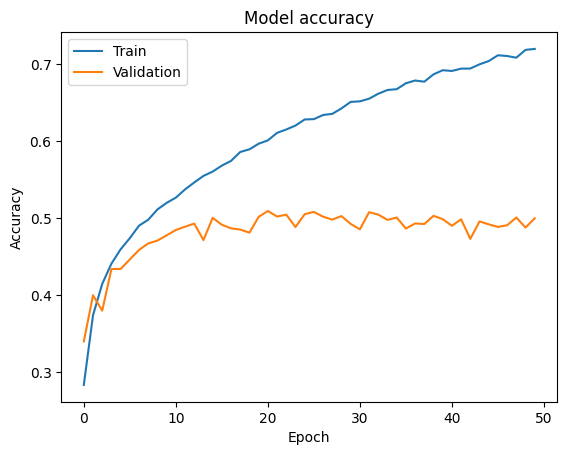

In [19]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

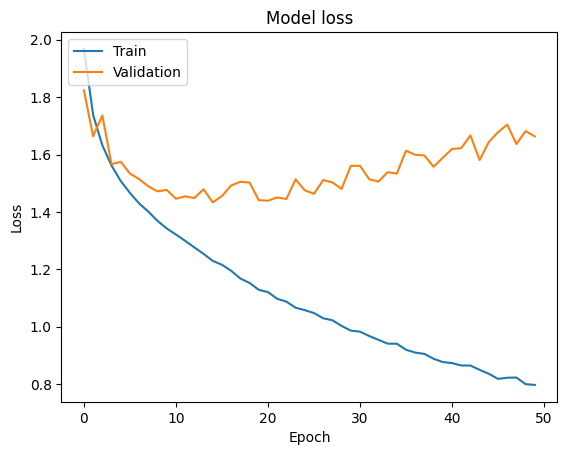

In [20]:
# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Backpropagation updates weights by calculating the gradient of the loss function with respect to each weight.
The learning rate scales the calculated gradient, determining how much the weights are adjusted during each update.
A larger learning rate leads to bigger weight changes, while a smaller one results in smaller adjustments.
This process continues through each layer, adjusting weights to minimize the error and improve the model's accuracy.

### **Model Evaluation**

In [21]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5016 - loss: 1.6017
Test Loss: 1.6243053674697876
Test Accuracy: 0.498199999332428


In [22]:
# Generating predictions for the test set
y_pred = model.predict(X_test)

# Converting predictions from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [23]:
# Generating a classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]))

Classification Report:
              precision    recall  f1-score   support

    airplane       0.54      0.60      0.57      1000
  automobile       0.57      0.62      0.60      1000
        bird       0.43      0.34      0.38      1000
         cat       0.33      0.34      0.34      1000
        deer       0.46      0.37      0.41      1000
         dog       0.38      0.40      0.39      1000
        frog       0.52      0.58      0.55      1000
       horse       0.56      0.54      0.55      1000
        ship       0.69      0.58      0.63      1000
       truck       0.51      0.61      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



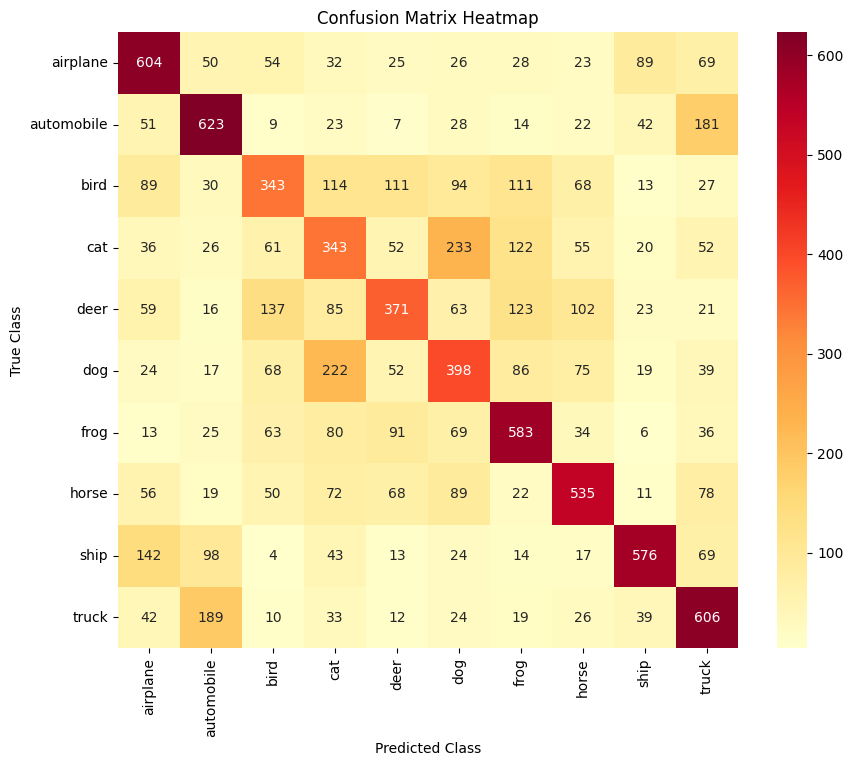

In [26]:
# Generating a confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrRd', xticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
], yticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
])

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix Heatmap')
plt.show()

To improve model performance if accuracy is low:
* Increase model complexity (more layers, neurons).
* Use more training data or data augmentation.
* Fine-tune hyperparameters (learning rate, batch size, etc.).
* Regularization techniques (dropout, weight decay).
* Explore different activation functions and optimizers.

### **Optimization Strategies**

Early Stopping:
* Monitors the validation loss during training.
* If the validation loss starts to increase while the training loss continues to decrease, it indicates overfitting.
* Stops the training process early to prevent the model from memorizing the training data and improve generalization on unseen data.

Learning Rate Scheduling:
* Gradually decreases the learning rate during training.
* Allows for faster initial convergence and fine-tuning in later stages, preventing oscillations around the optimal solution.
* Examples: Step decay, exponential decay, or cyclical learning rate schedules can be used.

Weight Initialization:
* Initializes weights to small random values or use specific initialization techniques (e.g., Xavier/Glorot initialization, He initialization).
* Proper initialization helps avoid vanishing or exploding gradients, leading to faster and more stable training.
* Affects the initial landscape of the optimization process and can impact how quickly the network converges to a good solution.

Weight initialization is crucial because it determines the initial state of the network's weights, significantly impacting how quickly and effectively the network learns. Poor initialization can lead to vanishing or exploding gradients, causing slow convergence or preventing the network from learning effectively. On the contrary, proper initialization can improve convergence speed and stability by avoiding these problems, allowing the network to learn more efficiently.

### **Report**

**Network Architecture:**
* Input Layer: Flattens 32x32x3 CIFAR-10 images.
* Hidden Layer 1: 512 neurons with ReLU activation (for non-linearity and avoiding vanishing gradients).
* Hidden Layer 2: 256 neurons with Tanh activation (for centering output and faster convergence).
* Output Layer: 10 neurons with Softmax activation (for multi-class probability distribution).

**Training & Test Accuracy:**
* Plots can be observed in previous iterations
* Train and Validation accuracy and loss over 50 epochs are plotted.
* Test accuracy is calculated and displayed after training completion.

**Hyperparameters:**
* Learning Rate: 0.001 (default Adam optimizer learning rate)
* Batch Size: 64
* Number of Epochs: 50
* Optimizer: Adam

**Challenges and Solutions:**
1. Challenge: Overfitting (validation loss increasing while training loss decreases). Solution: Early stopping can be implemented to stop training before overfitting occurs.
2. Challenge: Slow convergence. Solution: Learning rate scheduling could be used for a smoother convergence.